Accuracy: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



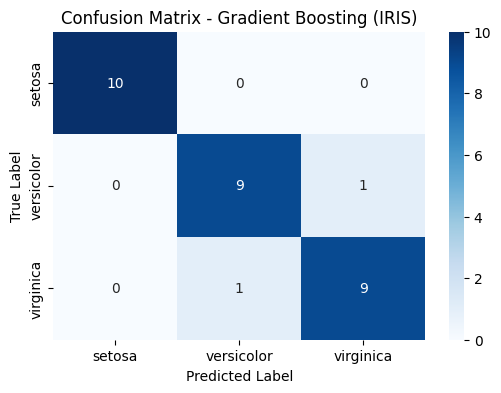

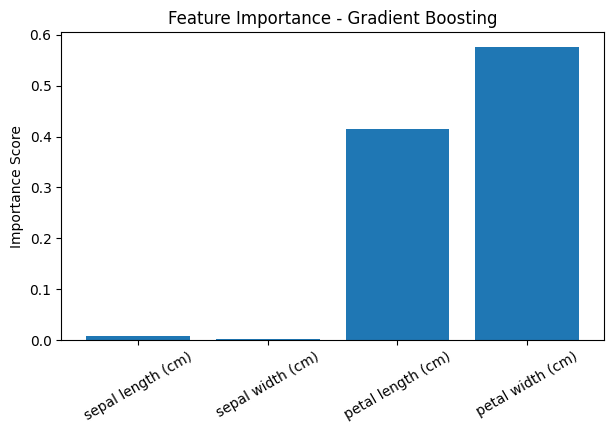

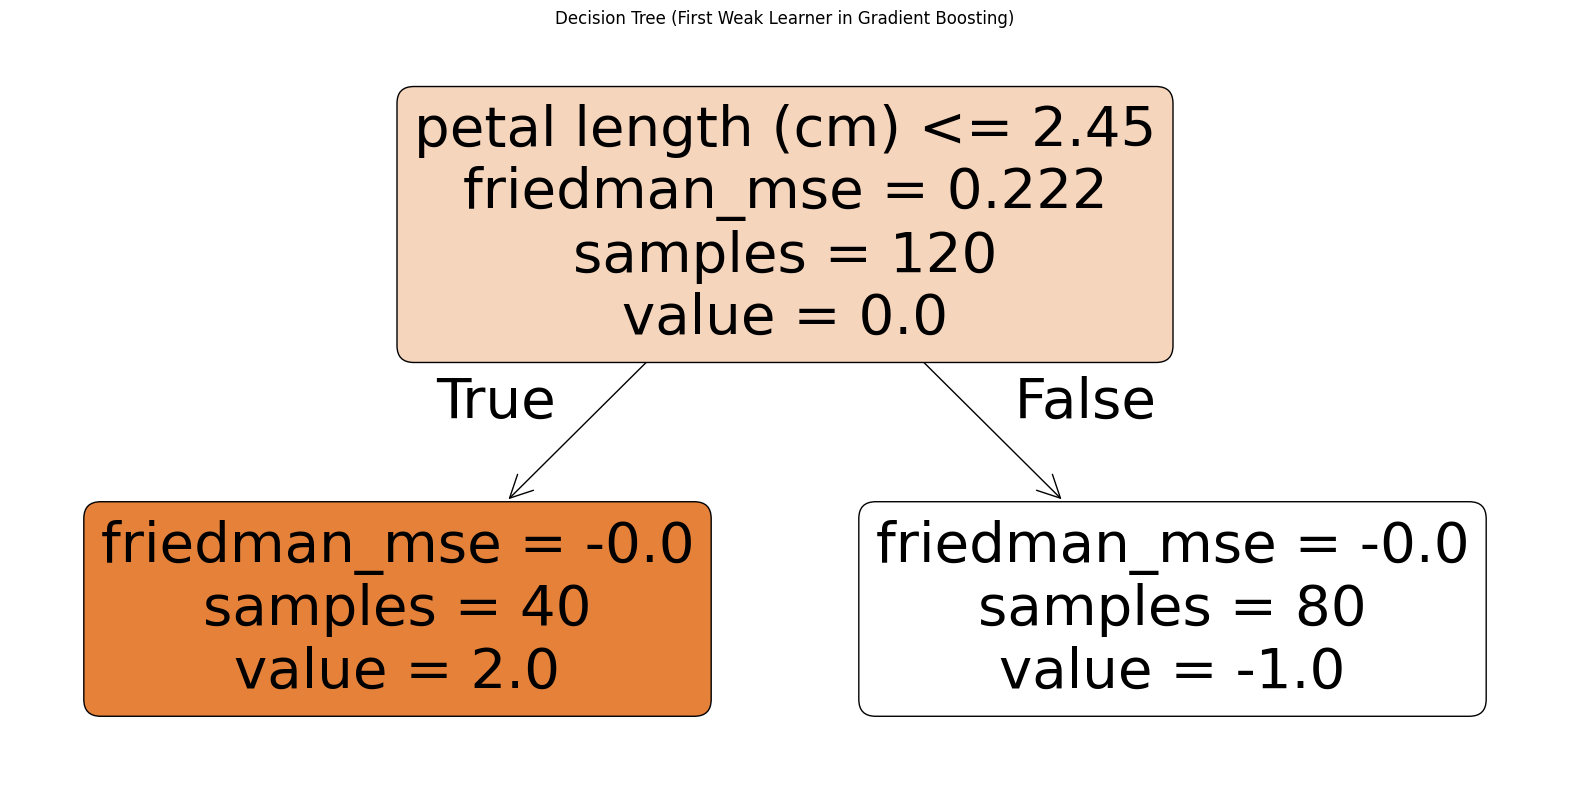

In [ ]:

# 1. Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# 2. Load IRIS Dataset

iris = load_iris()
X = iris.data
y = iris.target


# 3. Train-Test Split (VERY IMPORTANT)
# stratify=y prevents class imbalance

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# 4. Gradient Boosting Model (FIXED)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=2,        # shallow trees (weak learners)
    subsample=1.0,
    random_state=42
)

# 5. Train the Model

gb_model.fit(X_train, y_train)


# 6. Prediction

y_pred = gb_model.predict(X_test)


# 7. Accuracy & Classification Report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# 8. Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting (IRIS)")
plt.show()



# 9. Feature Importance Visualization
importances = gb_model.feature_importances_

plt.figure(figsize=(7,4))
plt.bar(iris.feature_names, importances)
plt.ylabel("Importance Score")
plt.xticks(rotation=30)
plt.title("Feature Importance - Gradient Boosting")
plt.show()


# 10. Decision Tree Visualization
# (One weak learner from the ensemble)

plt.figure(figsize=(20,10))

plot_tree(
    gb_model.estimators_[0, 0],   # first weak decision tree
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

plt.title("Decision Tree (First Weak Learner in Gradient Boosting)")
plt.show()


Accuracy: 0.9666666666666667

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



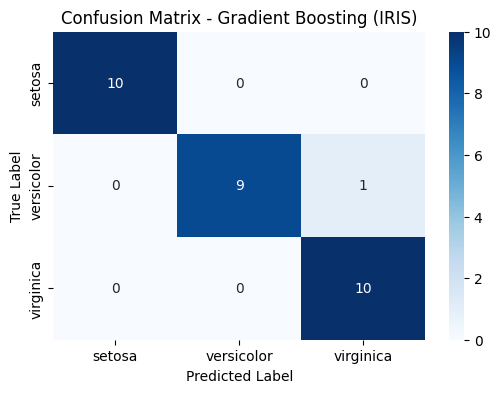

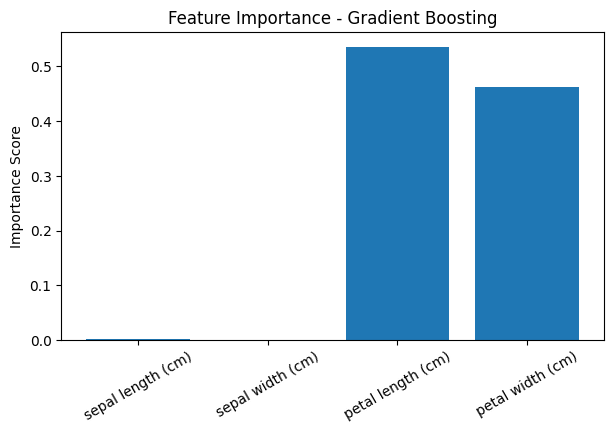

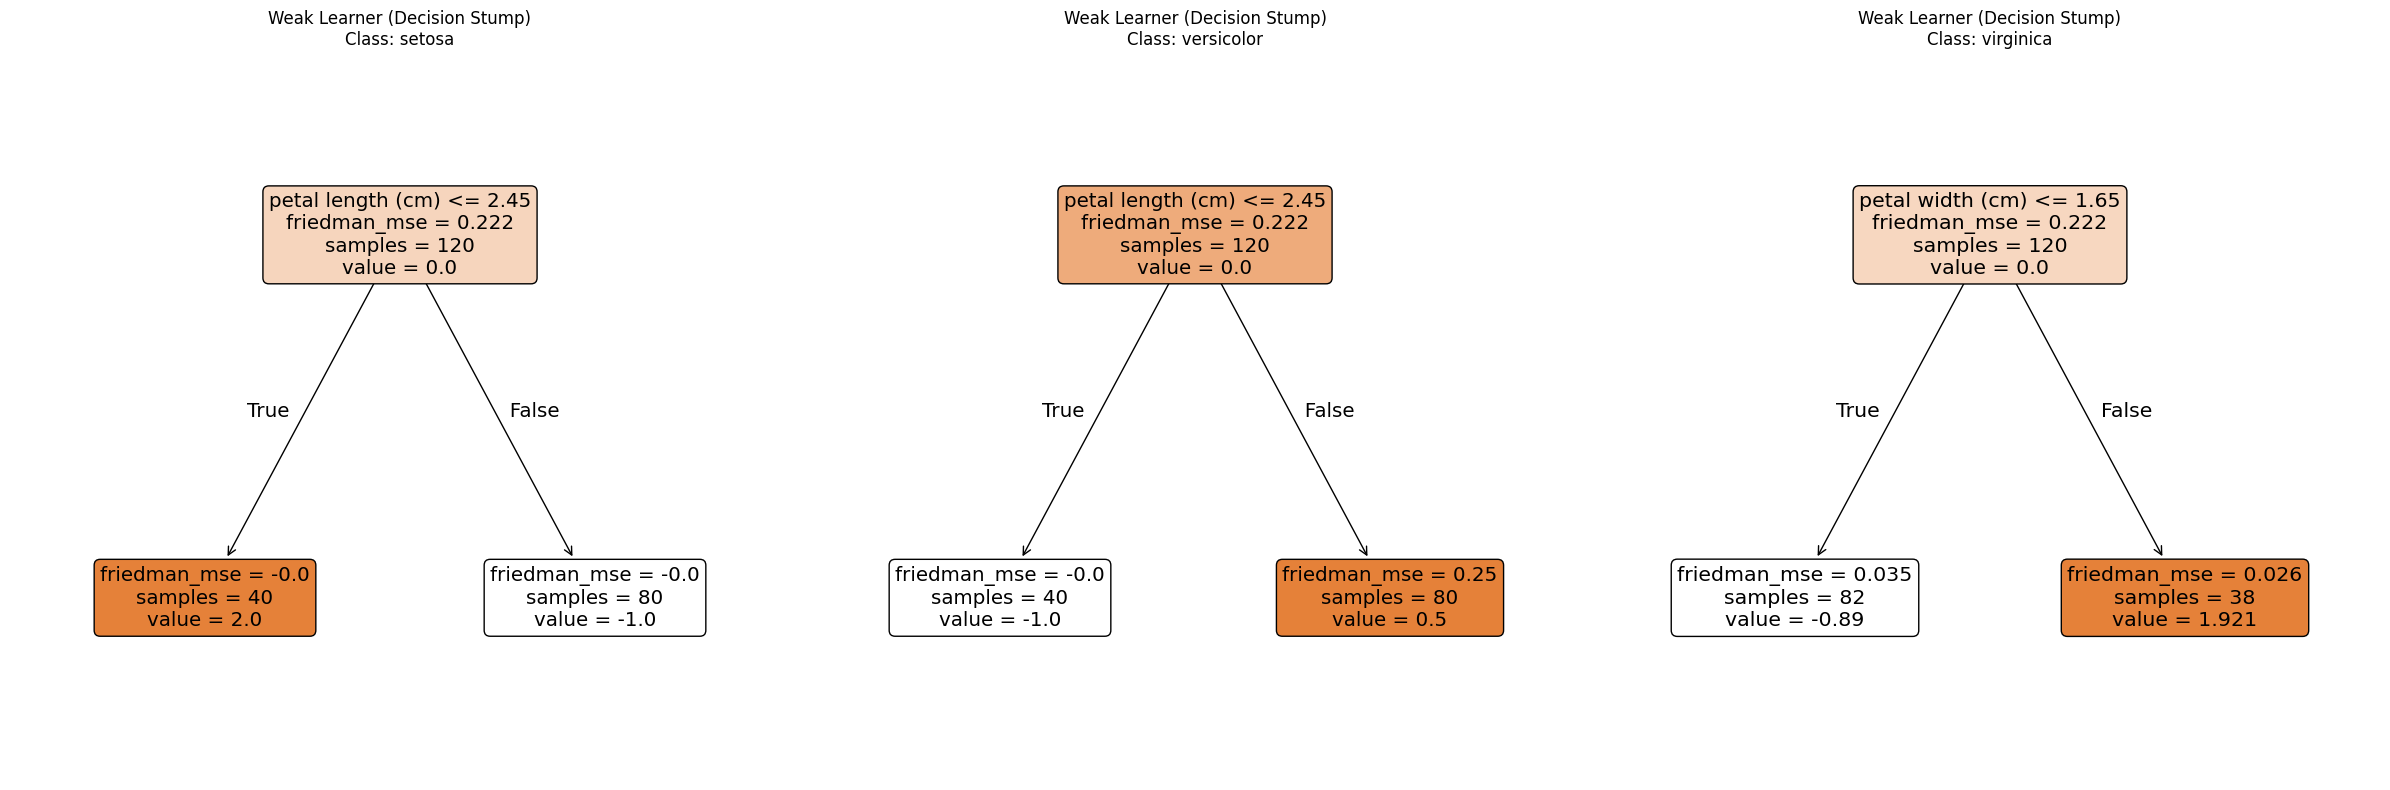

In [1]:

# 1. Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


# 2. Load IRIS Dataset

iris = load_iris()
X = iris.data
y = iris.target



# 3. Train-Test Split (IMPORTANT)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Gradient Boosting Model
#    Decision Stumps (max_depth=1)

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=1,          # 🔑 decision stump
    random_state=42
)

# 5. Train the Model

gb_model.fit(X_train, y_train)


# 6. Prediction

y_pred = gb_model.predict(X_test)


# 7. Accuracy & Classification Report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# 8. Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting (IRIS)")
plt.show()

# 9. Feature Importance Visualization

importances = gb_model.feature_importances_

plt.figure(figsize=(7,4))
plt.bar(iris.feature_names, importances)
plt.ylabel("Importance Score")
plt.xticks(rotation=30)
plt.title("Feature Importance - Gradient Boosting")
plt.show()


# 10. VISUALIZE THREE WEAK LEARNERS
#     (First Boosting Stage - 3 Classes)

plt.figure(figsize=(24, 8))

for class_idx in range(3):
    plt.subplot(1, 3, class_idx + 1)

    plot_tree(
        gb_model.estimators_[0, class_idx],   # stage 0, class i
        feature_names=iris.feature_names,
        class_names=[iris.target_names[class_idx]],
        filled=True,
        rounded=True
    )

    plt.title(f"Weak Learner (Decision Stump)\nClass: {iris.target_names[class_idx]}")

plt.tight_layout()
plt.show()
